# Load Save weights to model
학습 후 저장된 가중치를 불러와서 모델에 적용시키고 추론 수행

## Env set

In [10]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import os
import copy

import time
from tqdm import tqdm
import matplotlib.pyplot as plt

cudnn.benchmark = True

## Load data for inference

In [11]:
test_preprocess = torchvision.transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

batch_size = 32

cifar10_test = torchvision.datasets.CIFAR10('./dataset',
                                            train=False,
                                            download=True,
                                            transform=test_preprocess)
test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


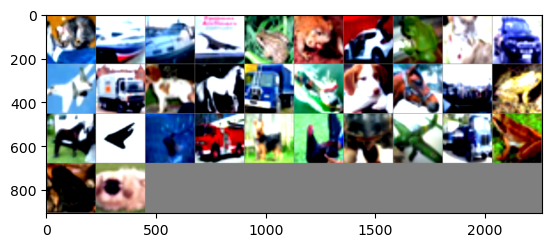

cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship  dog   horse ship  frog  horse plane deer  truck dog   bird  deer  plane truck frog  frog  dog  


In [12]:
# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(test_loader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images, 10))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Model load

### Load initial model from hub

In [13]:
## initial models
res18 = torch.hub.load('pytorch/vision:v0.10.0',
                       'resnet18', pretrained=False, progress=True)
res34 = torch.hub.load('pytorch/vision:v0.10.0',
                       'resnet34', pretrained=False, progress=True)
res50 = torch.hub.load('pytorch/vision:v0.10.0',
                       'resnet50', pretrained=False, progress=True)
res101 = torch.hub.load('pytorch/vision:v0.10.0',
                        'resnet101', pretrained=False, progress=True)
res152 = torch.hub.load('pytorch/vision:v0.10.0',
                        'resnet152', pretrained=False, progress=True)

Using cache found in /Users/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /Users/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /Users/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /Users/jpark/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /Users/jpark/.cache/torch/hub/pytorch_vision_v0.10.0


### Load saved weights to the model
별도 선언해준 구조까지 모두 적용 후 저장된 가중치 파일을 적용<br>
<br>
**ResNet18**

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = res18
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(classes))


In [15]:

## load saved weigts to the initial model
path = './checkpoint/res18_weights.pth'
saved_weights = torch.load(path)
model_ft.load_state_dict(saved_weights)

res18_ft = model_ft.to(device)

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

**ResNet34**

In [6]:
model_ft = res34
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(classes))

## load saved weigts to the initial model
path = './best_model/res34_weights.pth'
saved_weights = torch.load(path)
model_ft.load_state_dict(saved_weights)

res34_ft = model_ft.to(device)

**ResNet50**

In [7]:
model_ft = res50
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(classes))

## load saved weigts to the initial model
path = './best_model/res50_weights.pth'
saved_weights = torch.load(path)
model_ft.load_state_dict(saved_weights)

res50_ft = model_ft.to(device)

**ResNet101**

In [8]:
model_ft = res101
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(classes))

## load saved weigts to the initial model
path = './best_model/res101_weights.pth'
saved_weights = torch.load(path)
model_ft.load_state_dict(saved_weights)

res101_ft = model_ft.to(device)

**ResNet152**

In [9]:
model_ft = res152
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(classes))

## load saved weigts to the initial model
path = './best_model/res152_weights.pth'
saved_weights = torch.load(path)
model_ft.load_state_dict(saved_weights)

res152_ft = model_ft.to(device)

## Inference
불러온 가중치로 업데이트된 모델들에 대한 추론 시간 비교<br>

### ResNet18
#### GPU : RTX 3080 ti (w01 node)

In [10]:
# gpu set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Test the model
if torch.cuda.is_available():
    res18_ft.to('cuda')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res18_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res18")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [00:16<00:00, 18.63it/s]

모델명 : model_res18
Accuracy of the model on the test images: 91.04 %
소요시간 :  16.803656101226807


#### CPU (w01 node)

In [11]:
# gpu set
device = torch.device('cpu')

# Test the model
if torch.cuda.is_available():
    res18_ft.to('cpu')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res18_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res18")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [02:49<00:00,  1.85it/s]

모델명 : model_res18
Accuracy of the model on the test images: 91.04 %
소요시간 :  169.54597854614258


### ResNet34
#### GPU

In [12]:
# gpu set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Test the model
if torch.cuda.is_available():
    res34_ft.to('cuda')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res34_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res34")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [00:17<00:00, 18.26it/s]

모델명 : model_res34
Accuracy of the model on the test images: 92.84 %
소요시간 :  17.141077518463135


#### CPU

In [13]:
# gpu set
device = torch.device('cpu')

# Test the model
if torch.cuda.is_available():
    res34_ft.to('cpu')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res34_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res34")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [04:40<00:00,  1.12it/s]

모델명 : model_res34
Accuracy of the model on the test images: 92.84 %
소요시간 :  280.5474326610565


### ResNet50
#### GPU

In [14]:
# gpu set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Test the model
if torch.cuda.is_available():
    res50_ft.to('cuda')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res50_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res50")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [00:19<00:00, 15.65it/s]

모델명 : model_res50
Accuracy of the model on the test images: 93.37 %
소요시간 :  19.997405767440796


#### CPU

In [15]:
# gpu set
device = torch.device('cpu')

# Test the model
if torch.cuda.is_available():
    res50_ft.to('cpu')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res50_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res50")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [08:43<00:00,  1.67s/it]

모델명 : model_res50
Accuracy of the model on the test images: 93.37 %
소요시간 :  523.9516932964325


### ResNet101
#### GPU

In [16]:
# gpu set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Test the model
if torch.cuda.is_available():
    res101_ft.to('cuda')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res101_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res101")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [00:25<00:00, 12.10it/s]

모델명 : model_res101
Accuracy of the model on the test images: 94.4 %
소요시간 :  25.875438451766968


#### CPU

In [17]:
# gpu set
device = torch.device('cpu')

# Test the model
if torch.cuda.is_available():
    res101_ft.to('cpu')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res101_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res101")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [13:25<00:00,  2.57s/it]

모델명 : model_res101
Accuracy of the model on the test images: 94.41 %
소요시간 :  805.4357748031616


### ResNet152
#### GPU

In [18]:
# gpu set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Test the model
if torch.cuda.is_available():
    res152_ft.to('cuda')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res152_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res152")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [00:30<00:00, 10.16it/s]

모델명 : model_res152
Accuracy of the model on the test images: 95.11 %
소요시간 :  30.793837785720825


#### CPU

In [20]:
# gpu set
device = torch.device('cpu')

# Test the model
if torch.cuda.is_available():
    res152_ft.to('cpu')

with torch.no_grad():
    start = time.time()
    correct = 0
    total = 0
    for data in tqdm(test_loader, mininterval=0.01):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = res152_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("모델명 : model_res152")
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
    print("소요시간 : ", time.time() - start)

100%|█████████████████████████████████████████████████| 313/313 [18:41<00:00,  3.58s/it]

모델명 : model_res152
Accuracy of the model on the test images: 95.11 %
소요시간 :  1121.0137231349945
